# Import Dataset and preliminary description

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('data/churn.csv')
df.head(5)

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

The dataset includes 22 variables and 1 target (churn_risk_score). There are up to 36992 observations with some missing values for specific variables, e.g. region_category.

In [81]:
df.nunique()

Unnamed: 0                      36992
age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [82]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f"There are {duplicates} duplicates.")

There are 0 duplicates.


## Examination of the different variables

### examine 'Unamed: 0'

In [83]:
print(df['Unnamed: 0'].describe())
df.drop(['Unnamed: 0'], axis=1, inplace=True)

count    36992.000000
mean     18495.500000
std      10678.814916
min          0.000000
25%       9247.750000
50%      18495.500000
75%      27743.250000
max      36991.000000
Name: Unnamed: 0, dtype: float64


We drop 'Unnamed: 0' since it's just a index number that should not have any predictive power.

### examine 'age'

In [84]:
print(df['age'].unique())
df['age'].describe()

[18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 48 43 29 10
 20 61 17 12 52 26 49 24 22 36 58 41 50 23 38 35 28 53 55 59 47 54 62 51
 56 27 14 46 15 64 63]


count    36992.000000
mean        37.118161
std         15.867412
min         10.000000
25%         23.000000
50%         37.000000
75%         51.000000
max         64.000000
Name: age, dtype: float64

'age' ranges from 10 to 64. Ten year olds seem a little bit, however, given that there are no additional information about the product we keep them. Since there are only numerical values, no transforming is neccessary.

### examine 'gender'

In [85]:
print(df['gender'].unique())
# convert to category
df['gender'] = df['gender'].astype('category')
df['gender'].describe()

['F' 'M' 'Unknown']


count     36992
unique        3
top           F
freq      18490
Name: gender, dtype: object

For 'gender' there are 3 values: 'F', 'M', and 'Unknown'. Since this is a categorical variable, we transform the values to categorical.

### examine 'security_no'

In [86]:
print(df['security_no'].describe())
df.drop(['security_no'], axis=1, inplace=True)

count       36992
unique      36992
top       XW0DQ7H
freq            1
Name: security_no, dtype: object


We drop 'security_no' since it's a random number that should not have any predictive power.

### examine 'region_category'

In [87]:
print(df['region_category'].unique())
print(df['region_category'].isna().sum())
print(df['region_category'].isna().sum()/ df['region_category'].isna().count())
df['region_category'] = df['region_category'].astype('category')
df['region_category'].describe()

['Village' 'City' 'Town' nan]
5428
0.14673442906574394


count     31564
unique        3
top        Town
freq      14128
Name: region_category, dtype: object

'region_category' has three unique values: 'Village', 'City', 'Town' and 5428 missing values (14.67%). We convert it to a categorical variable.

### examine 'membership_category'

In [88]:
print(df['membership_category'].describe())
print(df['membership_category'].unique())

count                36992
unique                   6
top       Basic Membership
freq                  7724
Name: membership_category, dtype: object
['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']


'membership_category' will be ordinally encoded after train test split. We argue that there is a ranking order between the membership categories. From least value to most value: 'No Membership' up to 'Premium Membership'.

### examine 'joining_date'

In [89]:
# Convert 'joining_date' to datetime 
# (datetime is the only format for date, but includes always the time componente. As it is 00:00:00 it is not displayed in the table)
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d').dt.normalize() # normalize sets time to 00:00.00 - more save as to leave it out
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  category      
 2   region_category               31564 non-null  category      
 3   membership_category           36992 non-null  object        
 4   joining_date                  36992 non-null  datetime64[ns]
 5   joined_through_referral       36992 non-null  object        
 6   referral_id                   36992 non-null  object        
 7   preferred_offer_types         36704 non-null  object        
 8   medium_of_operation           36992 non-null  object        
 9   internet_option               36992 non-null  object        
 10  last_visit_time               36992 non-null  object        
 11  days_since_last_login       

In [90]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [91]:
print(df['joining_date'].min())
print(df['joining_date'].max())

2015-01-01 00:00:00
2017-12-31 00:00:00


The joining dates span over 3 years, from 2015 to 2017.

### examine 'joined_through_referral' and 'referral_id'

In [92]:
print(df['joined_through_referral'].unique())

#change "?" to "Unknown"
df['joined_through_referral'] = df['joined_through_referral'].replace("?", "Unknown")

# set to category
df['joined_through_referral'] = df['joined_through_referral'].astype('category')

['No' '?' 'Yes']


'joined_through_referral' has three unique values: 'No', '?', 'Yes'. We change '?' to 'Unknown' and we convert it to a categorical variable.

Next, we examine the relationship between 'joined_through_referral' and 'referral_id'

In [93]:
print(df['referral_id'].groupby(df['joined_through_referral']).unique())

joined_through_referral
No                                                [xxxxxxxx]
Unknown    [CID21329, CID56614, CID35062, CID29752, CID40...
Yes        [CID12313, CID3793, CID24708, CID19275, CID108...
Name: referral_id, dtype: object


/var/folders/j_/q313_db90837xdp_yhd1p0g00000gn/T/ipykernel_2452/2305088108.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df['referral_id'].groupby(df['joined_through_referral']).unique())


The initial thought is that there is a strong correlation between 'referral_id' and ' joined_through_referral' .   
**Assumption**:   
So that if someone is referred ('joined_through_referral' == Yes), then there must be value 'referral_id' (CID...) and if someone is not referred, then there would be no number (xxxxxxx).   
If there is no number for 'Unknown' category, then we could replace 'Unknown' with 'No' and if there is a valid number we could replace 'Unknown' with 'Yes'.

To be able to examine the possible correlation we want to plot it. So we introduce teh new column 'CID' which shows if there is a valid 'referral_id'.

In [94]:
df['referral_id'][df['referral_id'].str.startswith('CID')]
df['CID'] = df['referral_id']
df['CID'][df['CID'].str.startswith('CID')] = 'CID'

/var/folders/j_/q313_db90837xdp_yhd1p0g00000gn/T/ipykernel_2452/71707630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CID'][df['CID'].str.startswith('CID')] = 'CID'


We create the new column 'CID' consisting of CID if the 'referral_id' starts with 'CID'.

In [95]:
df['CID'].unique()

array(['xxxxxxxx', 'CID', 'No referral'], dtype=object)

<Axes: xlabel='CID', ylabel='count'>

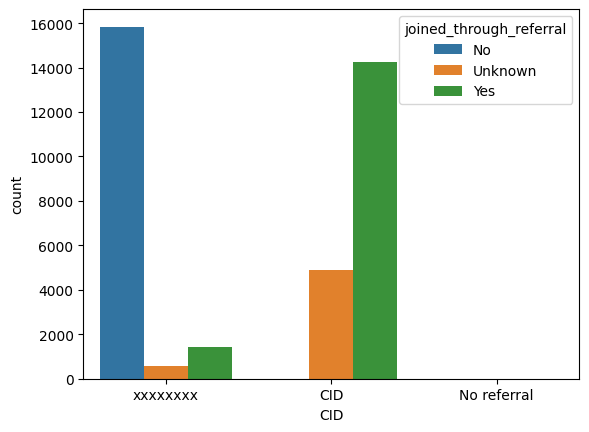

In [96]:
sns.countplot(df, hue='joined_through_referral', x='CID')

From the names of the variables we expected that all cases of 'XXXXXXXX' have not joined through referral (because there is no referral_id present), all cases with 'CID' have joined through referral (because a referral_id is present), and all cases of 'No referral' are ?. However, this didn't turned out to be true. As a consequence, we decided to drop 'referral_id'. This happens in notebook 04_data_cleaning_feature.

### examine 'preferred_offer_type'

In [97]:
print(df['preferred_offer_types'].unique())
print(df['preferred_offer_types'].isna().sum())
print(df['preferred_offer_types'].isna().sum()/ df['preferred_offer_types'].isna().count())
df['preferred_offer_types'] = df['preferred_offer_types'].astype('category')
df['preferred_offer_types'].describe()

['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
288
0.007785467128027681


count                     36704
unique                        3
top       Gift Vouchers/Coupons
freq                      12349
Name: preferred_offer_types, dtype: object

'preferred_offer_types' has three unique values: 'Gift Vouchers/Coupons', 'Credit/Debit Card Offers', 'Without Offers' and 288 missing values (0.008%). We convert it to a categorical variable. The nan values will be dropped in notebook 04_data_cleaning_feature.

### examine 'medium_of_operation'

In [98]:
print(df['medium_of_operation'].unique())
df['medium_of_operation'] = df['medium_of_operation'].astype('category')
df['medium_of_operation'].describe()

['?' 'Desktop' 'Smartphone' 'Both']


count       36992
unique          4
top       Desktop
freq        13913
Name: medium_of_operation, dtype: object

'medium_of_operation' has four unique values: '?', 'Desktop', 'Smartphone', and 'Both'. We convert it to a categorical variable.

### examine 'internet_option'

In [99]:
print(df['internet_option'].unique())
df['internet_option'] = df['internet_option'].astype('category')
df['internet_option'].describe()

['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']


count     36992
unique        3
top       Wi-Fi
freq      12413
Name: internet_option, dtype: object

'internet_option' has three unique values: 'Wi-Fi', 'Mobile_Data', and 'Fiber_Optic'. We convert it to a categorical variable.

### examine 'last_visit_time'

In [100]:
print(df['last_visit_time'].max())

23:59:59


As the maximum is 23:59:59 , 'last_visit_time' seems to be the last login timepoint

In [101]:
print(df['last_visit_time'].unique())
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time
print(df['last_visit_time'].unique())

['16:08:02' '12:38:13' '22:53:21' ... '04:14:05' '09:50:03' '01:39:52']
[datetime.time(16, 8, 2) datetime.time(12, 38, 13)
 datetime.time(22, 53, 21) ... datetime.time(4, 14, 5)
 datetime.time(9, 50, 3) datetime.time(1, 39, 52)]


We convert 'last_visit_time' to date time since it's a time.

### examine 'days_since_last_login'

In [98]:
print(df['days_since_last_login'].unique())
df['days_since_last_login'][df['days_since_last_login'] == -999].count()

[  17   16   14   11   20   23   10   19   15   13 -999    5   12    9
   21   18    1   22    4    8    3    6    2   24    7   26   25]


1999

A value of -999 doesn't make any sense. We suspect that there are 1999 clients who never logged into the site (indicated as -999).
We examine this further in notebook 04_data_cleaning_feature.ipynb

### examine 'avg_time_spent'

In [99]:
print(df['avg_time_spent'].describe())

count    36992.000000
mean       243.472334
std        398.289149
min      -2814.109110
25%         60.102500
50%        161.765000
75%        356.515000
max       3235.578521
Name: avg_time_spent, dtype: float64


There are negative values which don't make sense. Looking at the min/max values, we assume that the time is in seconds per session.

### examine 'avg_transaction_value'

In [102]:
print(df['avg_transaction_value'].isna().sum()) # check for missing values
print(df['avg_transaction_value'].describe())

0
count    36992.000000
mean     29271.194003
std      19444.806226
min        800.460000
25%      14177.540000
50%      27554.485000
75%      40855.110000
max      99914.050000
Name: avg_transaction_value, dtype: float64


Since there are only numerical values, no transforming is neccessary.

### examine 'avg_frequency_login_days'

count     36992
unique     1654
top       Error
freq       3522
Name: avg_frequency_login_days, dtype: object
['17.0' '10.0' '22.0' ... '-9.32551114210603' '-8.759329712785977'
 '27.8399274405269']
There are 3522 istances of 'Error'.


<Axes: xlabel='avg_frequency_login_days', ylabel='Count'>

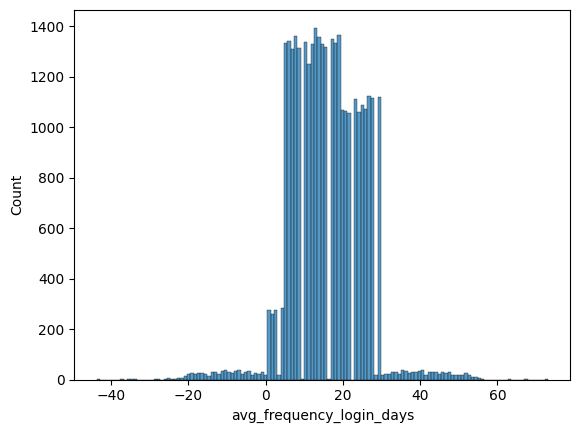

In [103]:
print(df['avg_frequency_login_days'].describe())
print(df['avg_frequency_login_days'].unique())

error = df['avg_frequency_login_days'][df['avg_frequency_login_days'] == 'Error'].count()
print(f"There are {error} istances of 'Error'.")
df['avg_frequency_login_days'][df['avg_frequency_login_days'] != 'Error'].astype('float32').describe()
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce').astype('float32') # errors = coerce, converts non-numeric values to NaN

sns.histplot(df['avg_frequency_login_days'] )


It's strange that there are negative values for average frequency login days. The plot looks as if the data has already been log transformed.   
We'll take care of the 'Error' values in notebook 4 04_data_cleaning_feature to treat them like nan values.

### examine 'points_in_wallet'

count    33549.000000
mean       686.882199
std        194.063624
min       -760.661236
25%        616.150000
50%        697.620000
75%        763.950000
max       2069.069761
Name: points_in_wallet, dtype: float64
[781.75                nan 500.69       ... 242.97962545 639.51
 197.26441364]


<Axes: xlabel='points_in_wallet', ylabel='Count'>

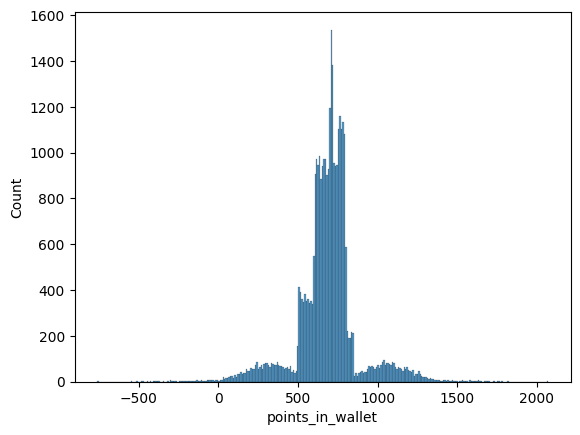

In [102]:
print(df['points_in_wallet'].describe())
print(df['points_in_wallet'].unique())

sns.histplot(df['points_in_wallet'] )

Similar distribution as 'avg_frequency_login_days'. There are some negative values.

### examine 'used_special_discount'

In [104]:
print(df['used_special_discount'].describe())
print(df['used_special_discount'].unique())

df['used_special_discount'] = df['used_special_discount'].astype('category')


count     36992
unique        2
top         Yes
freq      20342
Name: used_special_discount, dtype: object
['Yes' 'No']


'used_special_discount' has two unique values: 'Yes' and 'No'. We convert it to a categorical variable.

### examine 'offer_application_preference'

In [105]:
print(df['offer_application_preference'].describe())
print(df['offer_application_preference'].unique())

df['offer_application_preference'] = df['offer_application_preference'].astype('category')

count     36992
unique        2
top         Yes
freq      20440
Name: offer_application_preference, dtype: object
['Yes' 'No']


'offer_application_preference' has two unique values: 'Yes' and 'No'. We convert it to a categorical variable.

### examine 'past_complaint'

In [105]:
print(df['past_complaint'].describe())
print(df['past_complaint'].unique())

df['past_complaint'] = df['past_complaint'].astype('category')

count     36992
unique        2
top          No
freq      18602
Name: past_complaint, dtype: object
['No' 'Yes']


'past_complaint' has two unique values: 'Yes' and 'No'. We convert it to a categorical variable.

### examine 'complaint_status'

count              36992
unique                 5
top       Not Applicable
freq               18602
Name: complaint_status, dtype: object
['Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved', 'No Information Available']
Categories (5, object): ['No Information Available', 'Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved']


/var/folders/j_/q313_db90837xdp_yhd1p0g00000gn/T/ipykernel_2452/3262971174.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')


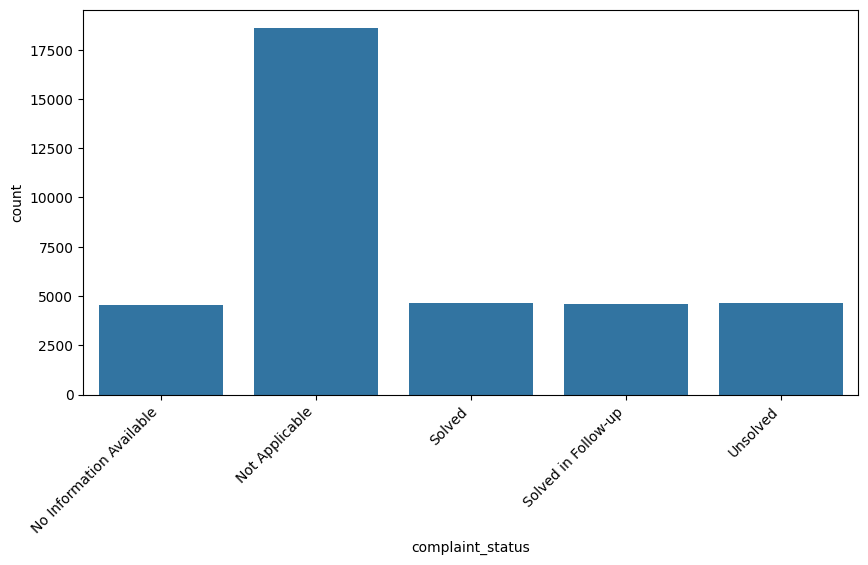

In [111]:
print(df['complaint_status'].describe())
print(df['complaint_status'].unique())

plt.figure(figsize=(10,5))
#chart = sns.histplot(df['complaint_status'])
chart = sns.countplot(x=df['complaint_status'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')

df['complaint_status'] = df['complaint_status'].astype('category')

'complaint_status' has five unique values: 'Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved' and 'No Information Available'. We convert it to a categorical variable.  
"Not applicable" may refer to the customers with no complaints.

### examine 'feedback'

count                    36992
unique                       9
top       Poor Product Quality
freq                      6350
Name: feedback, dtype: object
['Products always in Stock', 'Quality Customer Care', 'Poor Website', 'No reason specified', 'Poor Product Quality', 'Poor Customer Service', 'Too many ads', 'User Friendly Website', 'Reasonable Price']
Categories (9, object): ['No reason specified', 'Poor Customer Service', 'Poor Product Quality', 'Poor Website', ..., 'Quality Customer Care', 'Reasonable Price', 'Too many ads', 'User Friendly Website']


/var/folders/j_/q313_db90837xdp_yhd1p0g00000gn/T/ipykernel_2452/3250206907.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


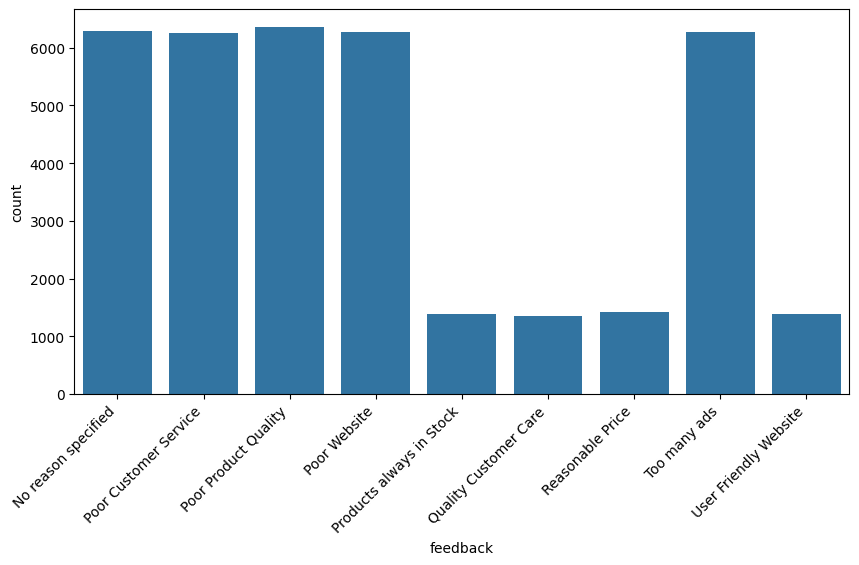

In [113]:
print(df['feedback'].describe())
print(df['feedback'].unique())

plt.figure(figsize=(10,5))
chart = sns.countplot(x=df['feedback'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

df['feedback'] = df['feedback'].astype('category')

'feedback' has nine unique values: 'Products always in Stock', 'Quality Customer Care', 'Poor Website', 'No reason specified', 'Poor Product Quality', 'Poor Customer Service', 'Too many ads', 'User Friendly Website' and 'Reasonable Price'. We convert it to a categorical variable.  
One could group the feedback by positive and negative feedback.

### examine 'churn_risk_score' (target)

count    36992.000000
mean         0.540982
std          0.498324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: churn_risk_score, dtype: float64
[0 1]


<Axes: xlabel='churn_risk_score', ylabel='count'>

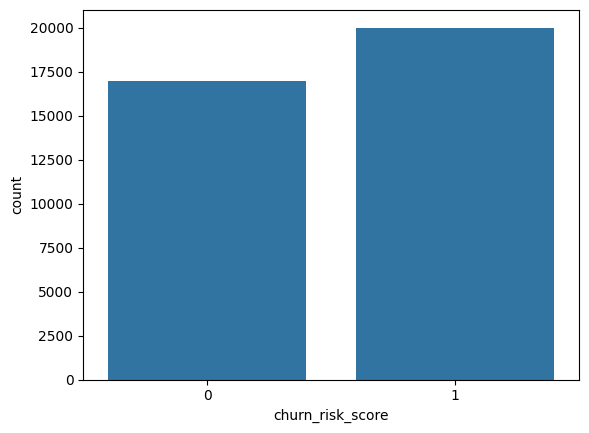

In [114]:
print(df['churn_risk_score'].describe())
print(df['churn_risk_score'].unique())
sns.countplot(x=df['churn_risk_score'])

As for the target 'churn_risk_score', there is a slight imbalance with more score 1 than score 0.

### Save the DataFrame as a Pickle as we want to keep the datatypes (which are not stored in csv)

In [115]:
# save the df to be used in another notebook
df.to_pickle('./data/df.pkl')